# Distribution Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate

#### Bernoulli
A Bernoulli distribution describes the distribution of a single binary random variable. A "1" can be interpreted as a "Hit" and a "0" as a "Miss". The parameter `p` is the probability for a "Hit".

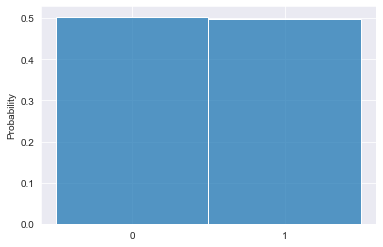

Mean: 0.500


In [62]:
# You can play around with this parameter
# p must satisfy 0<=p<=1
p = 0.5

def bernoulli(num_iter=100_000):
    assert (0.0<=p<=1.0)
    x = np.random.rand(num_iter)
    y = (x < p).astype(int)
    g = sns.histplot(y,
                     discrete=True,
                     stat='probability')
    g.set_xticks((0, 1))
    g.set_xticklabels(('0', '1'))
    plt.show()
    print(f'Mean: {p:0.3f}')

bernoulli()

#### Gaussian Distribution
The Gaussian Distribution, also called Normal Distribution, describes a real valued random variable. The Mean μ describes the position of the peak. The Variance σ is a measure of how broad the curve is. The inflection points of the curve are at μ±σ.

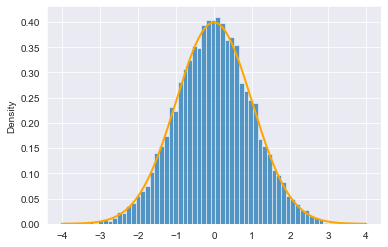

In [64]:
# You can play around with these parameters
mu = 0.0
# Sigma must satisfy 0<sigma
sigma = 1.0

def gaussian(num_iter=10_000):
    assert sigma>0.0
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = (1 / np.sqrt(2*np.pi*(sigma**2))) * np.exp(-1/(2*(sigma**2))*(x-mu)**2)
    y_mont = (np.random.randn(num_iter) * sigma) + mu
    g = sns.histplot(y_mont,
                     stat='density')
    plt.plot(x, y, color='orange', linewidth=2)
    # Uncomment next line to set custom limits for the x-axis
    # plt.xlim((-5, 5))
    plt.show()

gaussian()

#### Exponential Distribution

In [ ]:
# You can play around with this parameter
# Lambda must satifsy lambda > 0.0
lambda_e = 1.0

def exponential(num_iter=10_000):
    assert lambda_e > 0.0
    x = np.linspace(0, 10/lambda_e, 1000)
    y = lambda_e * np.exp(-(lambda_e * x))
    y_mont = np.random.exponential(1/lambda_e, num_iter)
    g = sns.histplot(y_mont,
                     stat='density')
    plt.plot(x, y, color='orange', linewidth=2)
    plt.show()

exponential()

#### Laplace Distribution

In [ ]:
# You can play around with this parameter
mu = 0.0
# Gamma mus satisfy gamma>0
gamma = 1.0

def laplace(num_iter=10_000):
    assert gamma > 0
    x = np.linspace(mu-8*gamma, mu+8*gamma, 1000)
    y = (0.5/gamma) * np.exp(-(np.abs(x - mu) / gamma))
    y_mont = np.random.laplace(mu, gamma, num_iter)
    g = sns.histplot(y_mont,
                     stat='density')
    plt.plot(x, y, color='orange', linewidth=2)
    plt.show()

laplace()

## Multivariate

#### Gaussian Distribution

In [ ]:
# You can play around with these parameters
sigma = np.array([0, 0])
mu = np.array([[1.0, 0.0],
               [0.0, 1.0]])

def multi_gaussian(num_iters=10000):
    y = np.random.randn(2, num_iters)
    y = (y.T @ mu).T + np.expand_dims(sigma, 1)
    sns.scatterplot(x=y[0], y=y[1])
    sns.histplot(x=y[0], y=y[1], bins=50, pthresh=.1)
    sns.kdeplot(x=y[0], y=y[1], levels=6, color="w", linewidths=1)
    plt.axis('equal')
    plt.show()

multi_gaussian()